In [5]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt   #python中画图工具包

[[-0.5       ]
 [-0.49497487]
 [-0.48994975]
 [-0.48492462]
 [-0.4798995 ]
 [-0.47487437]
 [-0.46984925]
 [-0.46482412]
 [-0.45979899]
 [-0.45477387]
 [-0.44974874]
 [-0.44472362]
 [-0.43969849]
 [-0.43467337]
 [-0.42964824]
 [-0.42462312]
 [-0.41959799]
 [-0.41457286]
 [-0.40954774]
 [-0.40452261]
 [-0.39949749]
 [-0.39447236]
 [-0.38944724]
 [-0.38442211]
 [-0.37939698]
 [-0.37437186]
 [-0.36934673]
 [-0.36432161]
 [-0.35929648]
 [-0.35427136]
 [-0.34924623]
 [-0.34422111]
 [-0.33919598]
 [-0.33417085]
 [-0.32914573]
 [-0.3241206 ]
 [-0.31909548]
 [-0.31407035]
 [-0.30904523]
 [-0.3040201 ]
 [-0.29899497]
 [-0.29396985]
 [-0.28894472]
 [-0.2839196 ]
 [-0.27889447]
 [-0.27386935]
 [-0.26884422]
 [-0.2638191 ]
 [-0.25879397]
 [-0.25376884]
 [-0.24874372]
 [-0.24371859]
 [-0.23869347]
 [-0.23366834]
 [-0.22864322]
 [-0.22361809]
 [-0.21859296]
 [-0.21356784]
 [-0.20854271]
 [-0.20351759]
 [-0.19849246]
 [-0.19346734]
 [-0.18844221]
 [-0.18341709]
 [-0.17839196]
 [-0.17336683]
 [-0.16834

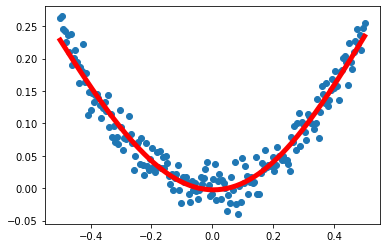

In [10]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis] 
#生成均匀分布的在-0.5,0.5之间生成200个点,最后参数设置维度
noise = np.random.normal(0,0.02,x_data.shape)#随机生成干扰项，和x_data形状一样,正态分布
y_data = np.square(x_data) + noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
#相当于两个形参

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)#双曲正切函数作为激活函数

#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))#因为只有一个输出层，所以为1行1列
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict= {x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)#样本散点
    plt.plot(x_data,prediction_value,'r-',lw=5)#预测线，结果为红线
    plt.show()